<p style="font-size:32px; font-weight: bolder; text-align: center"> Getting started </p>

This notebook provides an introduction to the tools that will be used for the _hands-on_ sessions of the MOOC "Path Integrals in Atomistic Modeling". Please follow the instructions to make sure that you have all the necessary components in place, and that you understand the basic mechanism to run simulations and analyze their outcome.  

## Hold on, what is a J-u-p-y-t-e-r notebook?

Basic knowledge of Python, and being able to run command from the terminal, are prerequisites to fully enjoy these interactive exercises. However, there is very little programming you actually have to do: the main purpose of these resources is to show the different techniques in action, and most of the exercises only require you to change a parameter and run existing code.

If you have never used a Jupyter notebook before, all you need to know is that it is a document that integrates text and explanations, such as this, with computable cells, that contain Python code and can generate data and visualize them. You can execute these cells, such as the one below, by selecting them and pressing `shift+enter`.

In [1]:
a = 2
b = a + 2
print(b)

4


In addition to exercises in Python, you will also run simulations using the i-PI software. Instructions to install it are given below: if you are running this notebook directly on your computer, you will need to open a terminal and perform the installation relative to the path where you have installed the notebooks. 
If you are running this in a JupyterLab installation (e.g. from a MOOC environment) you usually can open a terminal and install packages in your user folder within the JupyterLab environment (`File > New > Terminal`). 

## Installation

The notebooks associated with this course rely on some basic Python packages. If executing the following cell returns any errors, you should install the corresponding packages, e.g. using 

```
pip install -U numpy matplotlib ase chemiscope
```

`pimdmooc.py` is a small utility package that is present in the root folder of this repository.

_NB: at present chemiscope widgets don't work in a JupyterLab environment, but they are not essential to these exercises._

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ase, ase.io
import chemiscope
import pimdmooc
pimdmooc.add_ipi_paths()

You should also have [i-PI](https://ipi-code.org) installed, and accessible from the path. This might require some more effort: if everything is configured correctly the following cell should return a prompt, and a message stating that 

```Simulation has already run for total_steps, will not even start. Modify total_steps or step counter to continue.```

In [3]:
!i-pi 0-getting_started/do_nothing.xml


 ____       ____       ____       ____
/    \     /    \     /    \     /    \
|  #################################  |
\__#_/     \____/     \____/     \_#__/
   #    _        _______  _____    #
   #   (_)      |_   __ \|_   _|   #      -*-     v 2.0    -*-
   #   __  ______ | |__) | | |     #
   Y  [  ||______||  ___/  | |     #      A Universal Force Engine
  0 0  | |       _| |_    _| |_    #
   #  [___]     |_____|  |_____|   #
 __#_       ____       ____       _#__
/  # \     /    \     /    \     / #  \
|  #################################  |
\____/     \____/     \____/     \____/

    
 # Initializing simulation object 
Traceback (most recent call last):
  File "/home/i-pi//bin/i-pi", line 105, in <module>
    main(args[0], options)
  File "/home/i-pi//bin/i-pi", line 48, in main
    simulation = Simulation.load_from_xml(fn_input, request_banner=True, custom_verbosity=options.verbosity)
  File "/home/i-pi/ipi/engine/simulation.py", line 97, in load_from_xml
    simulation.bin

... and the following cell should generate a help string explaining the syntax for running `i-pi-driver`

In [4]:
!i-pi-driver

/bin/bash: i-pi-driver: command not found


If you get an error stating that the command has not been found, please open a terminal (`File > New > Terminal` if you are in Jupyterlab) and follow these instructions.

_NB: this will install i-PI in your home folder, which will make these notebooks work out-of-the-box. if you know what you are doing, you can personalize the installation as long as `i-pi` and `i-pi-driver` are accessible from the path_

1. clone the i-PI repository (might take a few minutes, depending on network speed)

``` 
$ git clone https://github.com/i-pi/i-pi.git 
```

2. add the i-pi folder to the default path

```
$ echo ". ~/i-pi/env.sh" >> .bashrc
```

_NB: you can also `source ~/i-pi/env.sh` from open terminals to set correctly the paths to i-PI_

3. compile the driver files 

```
$ cd i-pi/drivers/f90/
$ make
```

_NB: if you get an error, you need to install a Fortran compiler. If you are running in a didactic JupyterLab environment it should be there, otherwise ask your administrator_

4. try to execute again the cells above

## Running i-PI

i-PI functions following a client-server protocol, in which i-PI acts as the server, executing advanced MD simulations, while the evaluation of energies and forces is delegated to an external code, that acts as the client

![a scheme of the i-PI client-server model](figures/ipi-scheme.png)

Thus, to run i-PI you need to launch (at least) two processes: `i-pi` and a driver -- here we use a minimalistic FORTRAN tool that can compute energy and forces according to a number of simple potential energy models. 

1. open *two* terminals
2. in the first terminal launch `i-pi`

```
$ cd pimd-mooc/0-getting_started
$ i-pi input.xml
```

3. in the second terminal, launch the driver

```
$ i-pi-driver -u -h driver -m pswater -v
```

_NB: `i-pi-driver` does not need input files nor generate outputs, so you can run it from any folder_

Both programs run in verbose mode, so you can see the communication logs between the two. 

```
 @SOCKET:   Client asked for connection from . Now hand-shaking.
 @SOCKET:   Handshaking was successful. Added to the client list.
 @SOCKET: 21/09/17-15:49:35 Assigning [ none] request id    0 to client with last-id None (  0/  1 : )
 @SOCKET: 21/09/17-15:49:35 Assigning [match] request id    0 to client with last-id    0 (  0/  1 : )
 # Average timings at MD step       0. t/step: 4.08595e-02
 @SOCKET: 21/09/17-15:49:35 Assigning [match] request id    0 to client with last-id    0 (  0/  1 : )
 # Average timings at MD step       1. t/step: 3.96178e-02
 @SOCKET: 21/09/17-15:49:35 Assigning [match] request id    0 to client with last-id    0 (  0/  1 : )
```

and 

```
  Message from server: STATUS
  Message from server: POSDATA
  Message from server: STATUS
  Message from server: GETFORCE
  Message from server: STATUS
  Message from server: STATUS
  Message from server: POSDATA
  Message from server: STATUS
  Message from server: GETFORCE
  Message from server: STATUS
```

You can try to kill the driver with `CTRL+C` and see what happens. `i-pi` should stop and wait for the connection of another client: if you launch `i-pi-driver` again, the simulation will continue. This robust management of multiple client allows the implementation of a trivial level of parallelism when the advanced MD simulation require the calculation of multiple replicas, as we will see in the following exercises.

_NB: if `i-pi` exits abruptly (e.g. by closing down a shell) it will leave a UNIX domain socket file in `/tmp/`, named `/tmp/ipi-NAME`. If you launch again i-PI it will exit with an error message similar to_

```
Error opening unix socket. Check if a file /tmp/ipi_driver exists, and remove it if unused.
```

_needless to say: if you are reasonably confident this has been left around by a previous run, follow the instructions and remove the file._

### i-PI input file format

i-PI uses XML-formatted input files, that describe how the simulation is set up, where to get energy and forces from, and how to output the results of the simulation. in this course we will mostly use prepared input files, where the meaning of the parameters for each specific application will be explained only in relation to the concepts being covered. If you want to learn more about i-PI, you can visit the [website](https://ipi-code.org) or read the [documentation](https://ipi-code.org/i-pi/).

In [5]:
!cat 0-getting_started/input.xml   # the meaning of most of these options will become clear as the course progresses

<simulation verbosity='high'>
  <output prefix='simulation'>
    <properties stride='1' filename='out'>  [ time{picosecond}, temperature{kelvin}, kinetic_md, potential, conserved ] </properties>
    <trajectory filename='pos' format='xyz' stride='10'> positions{angstrom} </trajectory>  </output>
  <total_steps>1000</total_steps>
  <prng>
    <seed>23658</seed>
  </prng>
  <ffsocket mode='unix' pbc='false' name='driver'>
    <address>driver</address>
    <port>31400</port>
    <latency>0.02</latency>
    <timeout>400</timeout>
  </ffsocket>
  <system>
    <initialize nbeads='1'>
      <file mode='xyz' units='angstrom'> h2o.xyz </file>
      <cell mode='abc' units='angstrom'> [ 10.0, 10.0, 10.0 ] </cell>
      <velocities mode='thermal' units='kelvin'> 300 </velocities>
    </initialize>
    <forces>
      <force forcefield='driver'/>
    </forces>
    <ensemble>
      <temperature units='kelvin'>300</temperature>
    </ensemble>
    <motion mode='dynamics'>
      <fixcom>True</fixcom>
 

## Analyzing the results

After you have run your simulations (it might take a few minutes), you can look into the output files, load them and visualize them straight from the notebooks. i-PI does not have a pre-defined output format, and each run can be configured to output multiple files with different content and strides. 

The `<properties>` outputs contain properties of the system as a whole, such as the timestamp, temperature or potential energy of the system. The header of the file contains a summary of its content. In this simple example, the output is printed to `simulation.out`. _NB: Unless explicitly specified, *all* quantities read and output by i-PI are in Hartree atomic units_

In [8]:
!head 0-getting_started/simulation.out

# column   1     --> time{picosecond} : The elapsed simulation time.
# column   2     --> temperature{kelvin} : The current temperature, as obtained from the MD kinetic energy.
# column   3     --> kinetic_md : The kinetic energy of the (extended) classical system.
# column   4     --> potential : The physical system potential energy.
# column   5     --> conserved : The value of the conserved energy quantity per bead.
    0.00000000e+00     4.70238687e+02     5.27614876e-03     1.54786476e-02     2.08325459e-02   
    5.00000000e-04     2.83533681e+02     2.61547763e-03     1.69571451e-02     2.08605763e-02   
    1.00000000e-03     3.17185381e+02     3.09503685e-03     1.59465474e-02     2.08504741e-02   
    1.50000000e-03     4.86067953e+02     5.50172638e-03     1.22649446e-02     2.07969472e-02   
    2.00000000e-03     8.42812495e+02     1.05855746e-02     7.80478791e-03     2.07088221e-02   


In [9]:
simulation_data = pimdmooc.read_ipi_output("0-getting_started/simulation.out")

Text(0, 0.5, 'temperature / K')

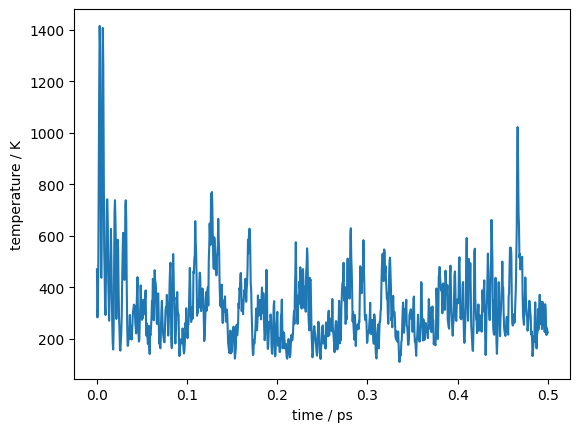

In [10]:
plt.plot(simulation_data["time"], simulation_data["temperature"])
plt.xlabel("time / ps"); plt.ylabel("temperature / K")

Atomic positions and properties are dumped to files based on the settings given in a `<trajectory>` tag. 
Here we use a combined visualizer called `chemiscope`, but obviously you can use alternative tools for this purpose.

In [11]:
trajectory_data = pimdmooc.read_ipi_xyz("0-getting_started/simulation.pos_0.xyz")

`chemiscope` allows you to visualize simultaneously properties and configurations

In [12]:
chemiscope.show(frames=trajectory_data, 
                properties=dict(
                    time=simulation_data["time"][::10], 
                    temperature=simulation_data["temperature"][::10],
                    potential=simulation_data["potential"][::10]
                               ),
                settings = {'structure': [{ 'keepOrientation': True, 'playbackDelay': 10}]}
               )

ChemiscopeWidget(value='{"meta": {"name": " "}, "settings": {"structure": [{"keepOrientation": true, "playback…

given that sometimes it is not trivial to set up a jupyter widget to load properly, if you have problems opening the visualization above you can also export the visualization as a .json file, that can be loaded on [chemiscope.org](https://chemiscope.org)

In [13]:
chemiscope.write_input("0-example.json.gz",
                frames=trajectory_data, 
                properties=dict(
                    time=simulation_data["time"][::10], 
                    temperature=simulation_data["temperature"][::10],
                    potential=simulation_data["potential"][::10]
                               )
               )